# House Sales Price

<br>
<img src="house_sale.png">
<br>

#### Os preços de venda de casas de conjunto de dados para King County, Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015. O conjunto de dados fornece recursos que as casas têm e o preço pelo qual elas foram vendidas. Pode ser usado para modelar a previsão de preços de casas.

#### O conjunto de dados está disponível em kaggle [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

#### Alguns dos atributos capturados no conjunto de dados são

- Número de quartos e banheiros
- Total de pés quadrados 
- Quantos andares
- Se tem um porão e tamanho do porão
- Classificação da casa
- Clima tem beira-mar e a qualidade da vista
- Quando a casa foi construída e se a casa é renovada, se for renovado
- Latitude e longitude
- preço da casa
- Quando a casa foi vendida



#### Levante algumas hipóteses a sua escolha e comprove se é possível não-rejeitar ou rejeitar, respondendo se as médias são estatisticamente iguais/equivalentes ou estatisticamente diferentes/significativas.

#### Exercício 1: Faça a leitura do dataset, colete suas informações básicas, verifique a distribuição e plote dispersão dos dados de preços das casas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
kc = pd.read_csv('kc_house_data.csv') 

In [3]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* Coletando  informações básicas

In [9]:

kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [22]:
round(kc.describe().T,)

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400880e+05,3.671270e+05,75000.0,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.000000e+00,1.000000e+00,0.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.000000e+00,1.000000e+00,0.0,2.000000e+00,2.000000e+00,2.000000e+00,8.000000e+00
sqft_living,21613.0,2.080000e+03,9.180000e+02,290.0,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510700e+04,4.142100e+04,520.0,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.000000e+00,1.000000e+00,1.0,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
waterfront,21613.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,0.000000e+00,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.000000e+00,1.000000e+00,1.0,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


* Verifique a distribuição do valores

In [17]:
# Media dos precos 
round(kc.price.mean(),2)

540088.14

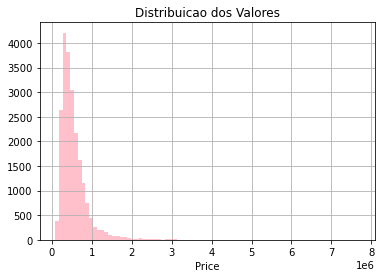

In [30]:
kc.price.hist(bins = 80, color= 'pink')
plt.title('Distribuicao dos Valores')
plt.xlabel('Price')
plt.show()

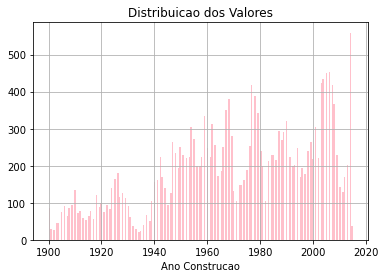

In [61]:
kc.yr_built.hist(bins = 200, color= 'pink')
plt.title('Distribuicao dos Valores')
plt.xlabel('Ano Construcao')
plt.show()

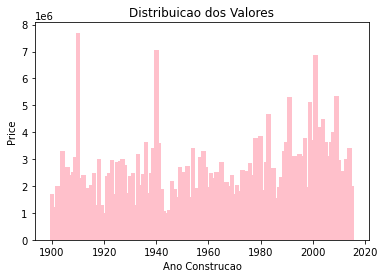

In [68]:
plt.bar(kc.yr_built, kc.price, width=1.75, color= 'pink')
plt.title('Distribuicao dos Valores')
plt.xlabel('Ano Construcao')
plt.ylabel('Price')
plt.show()

* plotando um  dispersão dos dados de preços das casas

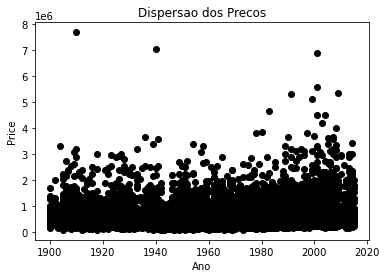

In [69]:
plt.scatter(x= kc.yr_built, y= kc.price, c ='black', alpha = 1 ) # scatter faz o grafico de dispersao
plt.title('Dispersao dos Precos')
plt.xlabel('Ano')
plt.ylabel('Price')
plt.show()

#### Exercício 2: Quais as 10 casas com a melhor relação custo/benefício do preço por metro quadrado?

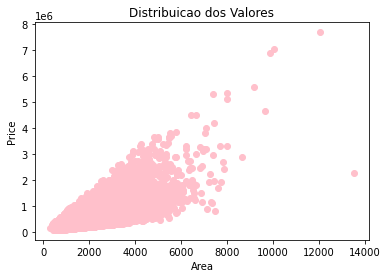

In [75]:
plt.scatter(kc.sqft_living, kc.price, c= 'pink', alpha=1)
plt.title('Distribuicao dos Valores')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

* Criando uma nova coluna com o preco por metro quadrado

In [79]:

kc['preco_por_metro_quadrado'] = kc.price/kc.sqft_living


* Pegando as 10 casas com os melhores precos -custo/beneficios

In [83]:
kc.preco_por_metro_quadrado.sort_values()[:10]

18262    87.588235
3785     87.647059
13825    87.713311
17197    88.000000
1385     88.028169
6523     88.083700
14993    88.150289
12185    88.541667
8200     88.541667
18590    88.698630
Name: preco_por_metro_quadrado, dtype: float64

#### Exercício 3: Qual a correlação do nível de classificação as casas em relação ao seu preço?

In [85]:
kc.grade. corr( kc.price)

0.6674342560202366

In [116]:
#Avaliando as classificacoes
kc.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

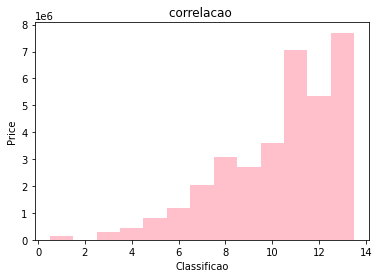

In [98]:
plt.bar(kc.grade, kc.price, width=1, color= 'pink')
plt.title('correlacao ')
plt.xlabel('Classificao')
plt.ylabel('Price')
plt.show()

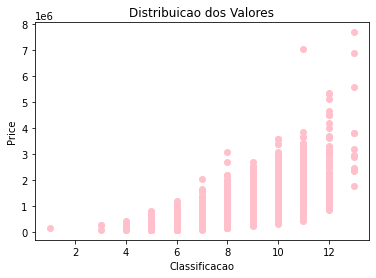

In [99]:
plt.scatter(kc.grade, kc.price, c= 'pink', alpha=1)
plt.title('Distribuicao dos Valores')
plt.xlabel('Classificacao')
plt.ylabel('Price')
plt.show()

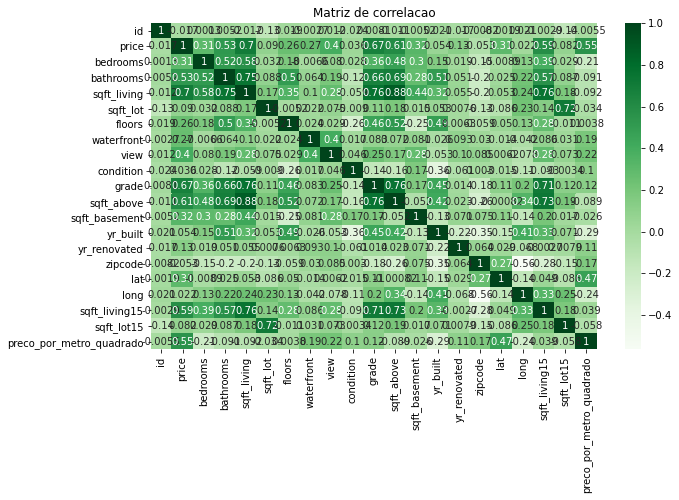

In [90]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Matriz de correlacao')
sns.heatmap(kc.corr(), cmap='Greens', annot= True) #matriz de correlação
plt.show()

#### Exercício 4: Podemos afirmar que estar de frente para o lago representa um fator que eleva o preço médio das casas, com uma confiança superior a 95%?

In [134]:
import scipy.stats as stats

casasNaoFrente_media = kc[kc['waterfront'] == 0]['price'].mean()
casasNaoFrente_desvPadrao = kc[kc['waterfront'] == 0]['price'].std()

casasPraAgua_media = kc[kc['waterfront'] == 1]['price'].mean()
casasPraAgua_desvPadrao = kc[kc['waterfront'] == 1]['price'].std()
print ('Nao tem vista para agua - Media = ' + str(round(casasNaoFrente_media, 2)))
print('Nao tem vista para agua - Desvio Padrao = ' + str(round(casasNaoFrente_desvPadrao, 2)))
print('tem vista para agua - Media  = ' + str(round(casasPraAgua_media, 2)))
print('tem vista para agua - Desvio Padrao  = ' + str(round(casasPraAgua_desvPadrao, 2)))

Nao tem vista para agua - Media = 531563.6
Nao tem vista para agua - Desvio Padrao = 341599.59
tem vista para agua - Media  = 1661876.02
tem vista para agua - Desvio Padrao  = 1120371.73


In [118]:
casasNaoFrente_desvPadrao

341599.58965588815